# Distribuciones de probabilidad con Python

<img alt="Distribuciones estadísticas" title="Distribuciones estadísticas" src="http://relopezbriega.github.io/images/distribution.png" high=650px width=600px>

## Introducción

Las [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria) han llegado a desempeñar un papel importante en casi todos los campos de estudio: en la [Física](https://es.wikipedia.org/wiki/F%C3%ADsica), la [Química](https://es.wikipedia.org/wiki/Qu%C3%ADmica) y la [Ingeniería](https://es.wikipedia.org/wiki/Ingenier%C3%ADa); y especialmente en las ciencias biológicas y sociales. Estas [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria) son medidas y analizadas en términos
de sus propiedades [estadísticas](https://es.wikipedia.org/wiki/Estad%C3%ADstica) y [probabilísticas](https://es.wikipedia.org/wiki/Probabilidad), de las cuales una característica subyacente es su [función de distribución](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). A pesar de que el número potencial de [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) puede ser muy grande, en la práctica, un número relativamente pequeño se utilizan; ya sea porque tienen características matemáticas que las hace fáciles de usar o porque se asemejan bastante bien a una porción de la realidad, o por ambas razones combinadas.

## ¿Por qué es importante conocer las distribuciones?

Muchos resultados en las ciencias se basan en conclusiones que se extraen sobre una población general a partir del estudio de una *[muestra](https://es.wikipedia.org/wiki/Muestra_estad%C3%ADstica)* de esta población. Este proceso se conoce como ***[inferencia estadística](https://es.wikipedia.org/wiki/Estad%C3%ADstica_inferencial)***; y este tipo de *inferencia* con frecuencia se basa en hacer suposiciones acerca de la forma en que los datos se distribuyen, o requiere realizar alguna transformación de los datos para que se ajusten mejor a alguna de las  [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) conocidas y estudiadas en profundidad.

Las [distribuciones de probabilidad](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) teóricas son útiles en la [inferencia estadística](https://es.wikipedia.org/wiki/Estad%C3%ADstica_inferencial) porque sus propiedades y características son conocidas. Si la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) real de un [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos) dado es razonablemente cercana a la de una [distribución de probabilidad](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) teórica, muchos de los cálculos se pueden realizar en los datos reales utilizando hipótesis extraídas de la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) teórica.
    
## Graficando distribuciones

### Histogramas

Una de las mejores maneras de describir una variable es representar los valores que aparecen en el [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos) y el número de veces que aparece cada valor. La representación más común de una [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) es un [histograma](https://es.wikipedia.org/wiki/Histograma), que es un gráfico que muestra la frecuencia de cada valor.

En [Python](http://python.org/), podemos graficar fácilmente un histograma con la ayuda de la función `hist` de [matplotlib](http://matplotlib.org/api/pyplot_api.html), simplemente debemos pasarle los datos y la cantidad de *contenedores* en los que queremos dividirlos. Por ejemplo, podríamos graficar el [histograma](https://es.wikipedia.org/wiki/Histograma) de una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) del siguiente modo.

In [8]:
# <!-- collapse=True -->
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

np.random.seed(2016) # replicar random

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
sns.set()

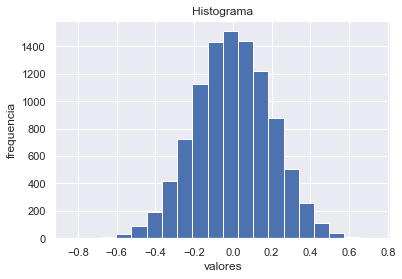

In [9]:
# Graficando histograma
mu, sigma = 0, 0.2 # media y desvio estandar
datos = np.random.normal(mu, sigma, 10000) #creando muestra de datos

# histograma de distribución normal.
plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

### Función de Masa de Probabilidad

Otra forma de representar a las [distribuciones discretas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad#Distribuciones_de_variable_discreta) es utilizando su [Función de Masa de Probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad) o [FMP](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad), la cual relaciona cada valor con su *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* en lugar de su *frecuencia* como vimos anteriormente. Esta función es *normalizada* de forma tal que el valor total de *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* sea 1. La ventaja que nos ofrece utilizar la [FMP](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad) es que podemos comparar dos [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) sin necesidad de ser confundidos por las diferencias en el tamaño de las *[muestras](https://es.wikipedia.org/wiki/Muestra_estad%C3%ADstica)*. También debemos tener en cuenta que [FMP](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad) funciona bien si el número de valores es pequeño; pero a medida que el número de valores aumenta, la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* asociada a cada valor se hace cada vez más pequeña y el efecto del *ruido aleatorio* aumenta. 
Veamos un ejemplo con [Python](http://python.org/).

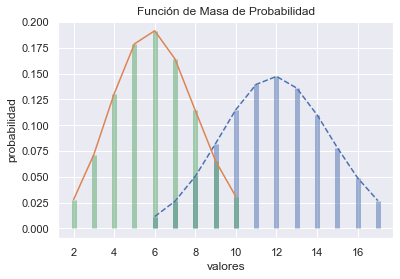

In [10]:
# Graficando FMP
n, p = 30, 0.4 # parametros de forma de la distribución binomial
n_1, p_1 = 20, 0.3 # parametros de forma de la distribución binomial
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1),
              stats.binom.ppf(0.99, n_1, p_1))
fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.plot(x_1, fmp_1)
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

### Función de Distribución Acumulada

Si queremos evitar los problemas que se generan con [FMP](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad) cuando el número de valores es muy grande, podemos recurrir a utilizar la [Función de Distribución Acumulada](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n) o [FDA](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n), para representar a nuestras [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad), tanto [discretas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad#Distribuciones_de_variable_discreta) como [continuas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad_continua). Esta función relaciona los valores con su correspondiente [percentil](https://es.wikipedia.org/wiki/Percentil); es decir que va a describir la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de que una [variable aleatoria](https://es.wikipedia.org/wiki/Variable_aleatoria) X sujeta a cierta ley de [distribución de probabilidad](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) se sitúe en la zona de valores menores o iguales a x.

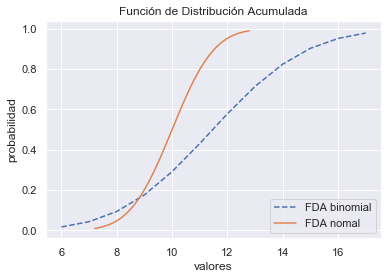

In [11]:
# Graficando Función de Distribución Acumulada con Python
x_1 = np.linspace(stats.norm(10, 1.2).ppf(0.01),
                  stats.norm(10, 1.2).ppf(0.99), 100)
fda_binom = stats.binom.cdf(x, n, p) # Función de Distribución Acumulada
fda_normal = stats.norm(10, 1.2).cdf(x_1) # Función de Distribución Acumulada
plt.plot(x, fda_binom, '--', label='FDA binomial')
plt.plot(x_1, fda_normal, label='FDA nomal')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=4)
plt.show()

### Función de Densidad de Probabilidad 

Por último, el equivalente a la [FMP](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad) para [distribuciones continuas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad_continua) es la [Función de Densidad de Probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad) o [FDP](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad). Esta función es la [derivada](https://es.wikipedia.org/wiki/Derivada) de la [Función de Distribución Acumulada](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n).
Por ejemplo, para la [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) que graficamos anteriormente, su [FDP](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad) es la siguiente. La típica forma de campana que caracteriza a esta [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad).

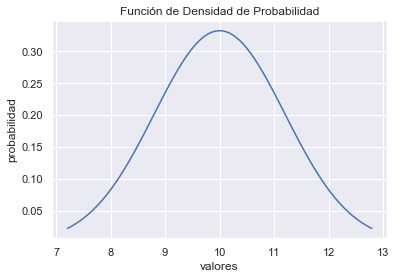

In [12]:
# Graficando Función de Densidad de Probibilidad con Python
FDP_normal = stats.norm(10, 1.2).pdf(x_1) # FDP
plt.plot(x_1, FDP_normal, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

## Distribuciones

Ahora que ya conocemos como podemos hacer para representar a las [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad); pasemos a analizar cada una de ellas en más detalle para conocer su forma, sus principales aplicaciones y sus propiedades. Comencemos por las [distribuciones discretas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad#Distribuciones_de_variable_discreta).

## Distribuciones Discretas

Las [distribuciones discretas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad#Distribuciones_de_variable_discreta) son aquellas en las que la variable puede tomar solo algunos valores determinados. Los principales exponentes de este grupo son las siguientes: 

### Distribución Poisson

La [Distribución Poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson) esta dada por la formula:

$$p(r; \mu) = \frac{\mu^r e^{-\mu}}{r!}$$

En dónde $r$ es un [entero](https://es.wikipedia.org/wiki/N%C3%BAmero_entero) ($r \ge 0$) y $\mu$ es un [número real](https://es.wikipedia.org/wiki/N%C3%BAmero_real) positivo. La [Distribución Poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson) describe la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de encontrar exactamente $r$ eventos en un lapso de tiempo si los acontecimientos se producen de forma independiente a una velocidad constante $\mu$. Es una de las [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) más utilizadas en [estadística](http://relopezbriega.github.io/tag/estadistica.html) con varias aplicaciones; como por ejemplo describir el número de fallos en un lote de materiales o la cantidad de llegadas por hora a un centro de servicios. 

En [Python](http://python.org/) la podemos generar fácilmente con la ayuda de [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html), paquete que utilizaremos para representar a todas las restantes [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) a lo largo de todo el artículo.

2.0
14.0
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


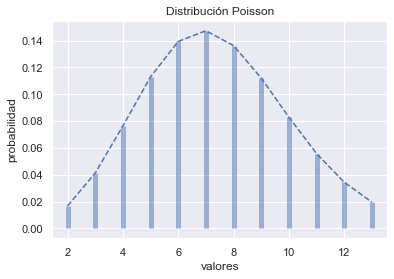

In [13]:
# Graficando Poisson
mu =  7.4 # parametro de forma 
poisson = stats.poisson(mu) # Distribución

print(poisson.ppf(0.01))
print(poisson.ppf(0.99))

x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
print(x)
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

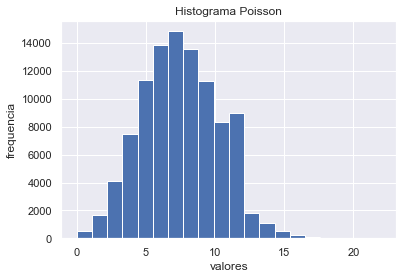

In [14]:
# histograma
aleatorios = poisson.rvs(100000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Poisson')
plt.show()

### Distribución Binomial

La [Distribución Binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial) esta dada por la formula:

$$p(r; N, p) = \left(\begin{array}{c} N \\ r \end{array}\right) p^r(1 - p)^{N - r}
$$

En dónde $r$ con la condición $0 \le r \le N$ y el parámetro $N$ ($N > 0$) son [enteros](https://es.wikipedia.org/wiki/N%C3%BAmero_entero); y el parámetro $p$ ($0 \le p \le 1$) es un [número real](https://es.wikipedia.org/wiki/N%C3%BAmero_real). La [Distribución Binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial) describe la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de exactamente $r$ éxitos en $N$ pruebas si la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de éxito en una sola prueba es $p$.

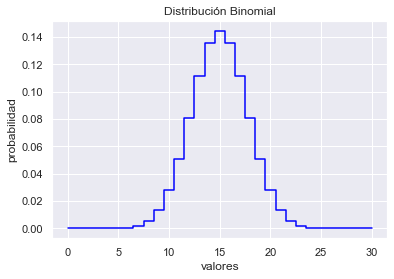

In [92]:
# Graficando Binomial
N, p = 30, 0.5 # parametros de forma 
binomial = stats.binom(N, p) # Distribución
# x = np.arange(binomial.ppf(0.01),
#              binomial.ppf(0.99))
x=range(0,31)
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
# plt.plot(x, fmp, '--')
plt.step(x, fmp, where='mid', color='blue')

#plt.vlines(x, 0, fmp, colors='b', lw=15, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

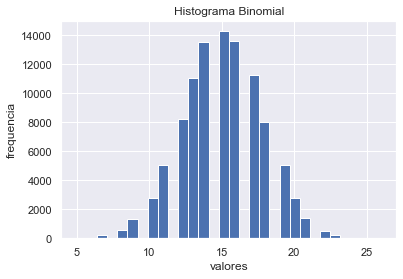

In [87]:
# histograma
aleatorios = binomial.rvs(100000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 30)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()

### Distribución Geométrica

La [Distribución Geométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_geom%C3%A9trica) esta dada por la formula:

$$p(r; p) = p(1- p)^{r-1}
$$

En dónde $r \ge 1$  y el parámetro $p$ ($0 \le p \le 1$) es un [número real](https://es.wikipedia.org/wiki/N%C3%BAmero_real). La [Distribución Geométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_geom%C3%A9trica) expresa la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de tener que esperar exactamente $r$ pruebas hasta encontrar el primer éxito si la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de éxito en una sola prueba es $p$. Por ejemplo, en un proceso de selección, podría definir el número de entrevistas que deberíamos realizar antes de encontrar al primer candidato aceptable.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]


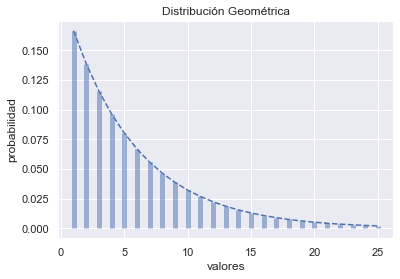

In [17]:
# Graficando Geométrica
p =  0.1666 # parametro de forma 
geometrica = stats.geom(p) # Distribución
x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))

print(x)
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

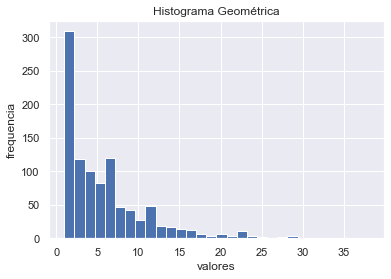

In [18]:
# histograma
aleatorios = geometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 30)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Geométrica')
plt.show()

### Distribución Hipergeométrica

La [Distribución Hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica) esta dada por la formula:

$$p(r; n, N, M) = \frac{\left(\begin{array}{c} M \\ r \end{array}\right)\left(\begin{array}{c} N - M\\ n -r \end{array}\right)}{\left(\begin{array}{c} N \\ n \end{array}\right)}
$$

En dónde el valor de $r$ esta limitado por $\max(0, n - N + M)$ y $\min(n, M)$ inclusive; y los parámetros $n$ ($1 \le n \le N$), $N$ ($N \ge 1$) y $M$ ($M \ge 1$) son todos [números enteros](https://es.wikipedia.org/wiki/N%C3%BAmero_entero). La [Distribución Hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica) describe experimentos en donde se seleccionan los elementos al azar *sin reemplazo* (se evita seleccionar el mismo elemento más de una vez). Más precisamente, supongamos que tenemos $N$ elementos de los cuales $M$ tienen un cierto atributo (y $N - M$ no tiene). Si escogemos $n$ elementos al azar *sin reemplazo*, $p(r)$ es la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de que exactamente $r$ de los elementos seleccionados provienen del grupo con el atributo.  

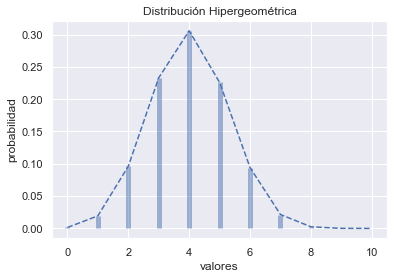

In [19]:
# Graficando Hipergeométrica
M, n, N = 30, 10, 12 # parametros de forma 
hipergeometrica = stats.hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

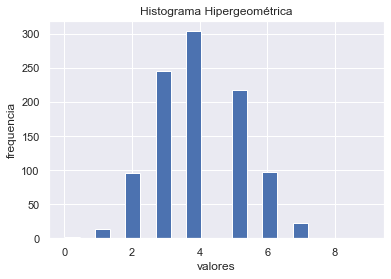

In [20]:
# histograma
aleatorios = hipergeometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Hipergeométrica')
plt.show()

### Distribución de Bernoulli

La [Distribución de Bernoulli](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Bernoulli) esta dada por la formula:

$$p(r;p) = \left\{
	\begin{array}{ll}
            1 - p = q  & \mbox{si } r = 0  \ \mbox{(fracaso)}\\
            p & \mbox{si } r = 1 \ \mbox{(éxito)}
	\end{array}
\right.$$

En dónde el parámetro $p$ es la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de éxito en un solo ensayo, la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de fracaso por lo tanto va a ser $1 - p$ (muchas veces expresada como $q$). Tanto $p$ como $q$ van a estar limitados al intervalo de cero a uno. La [Distribución de Bernoulli](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Bernoulli) describe un experimento probabilístico en donde el ensayo tiene dos posibles resultados, éxito o fracaso. Desde esta [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) se pueden deducir varias [Funciones de Densidad de Probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad) de otras [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) que se basen en una serie de ensayos independientes.

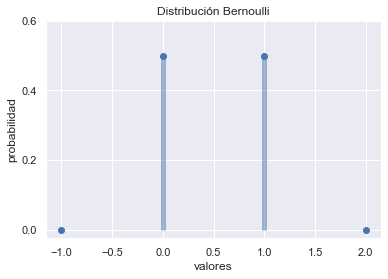

In [21]:
# Graficando Bernoulli
p =  0.5 # parametro de forma 
bernoulli = stats.bernoulli(p)
x = np.arange(-1, 3)
fmp = bernoulli.pmf(x) # Función de Masa de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6])
plt.title('Distribución Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

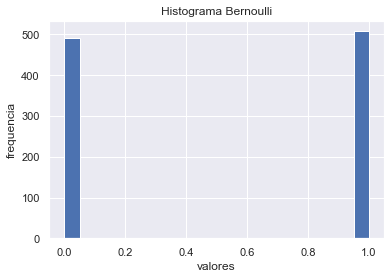

In [22]:
# histograma
aleatorios = bernoulli.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Bernoulli')
plt.show()



## Distribuciones continuas

Ahora que ya conocemos las principales [distribuciones discretas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad#Distribuciones_de_variable_discreta), podemos pasar a describir a las [distribuciones continuas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad_continua); en ellas a diferencia de lo que veíamos antes, la variable puede tomar cualquier valor dentro de un intervalo específico. Dentro de este grupo vamos a encontrar a las siguientes: 

### Distribución de Normal

La [Distribución Normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal), o también llamada [Distribución de Gauss](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal), es aplicable a un amplio rango de problemas, lo que la convierte en la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) más utilizada en [estadística](http://relopezbriega.github.io/tag/estadistica.html); esta dada por la formula:

$$p(x;\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2}\left(\frac{x - \mu}{\sigma} \right)^2}
$$

En dónde $\mu$ es el parámetro de ubicación, y va a ser igual a la [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) y $\sigma^2$ es el [desvío estándar](https://es.wikipedia.org/wiki/Desviaci%C3%B3n_t%C3%ADpica). Algunos ejemplos de variables asociadas a fenómenos naturales que siguen el modelo de la [Distribución Normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) son:
* características morfológicas de individuos, como la estatura;
* características sociológicas, como el consumo de cierto producto por un mismo grupo de individuos;
* características psicológicas, como el cociente intelectual;
* nivel de ruido en telecomunicaciones;
* errores cometidos al medir ciertas magnitudes;
* etc.

In [23]:
print(range(0,5))

range(0, 5)


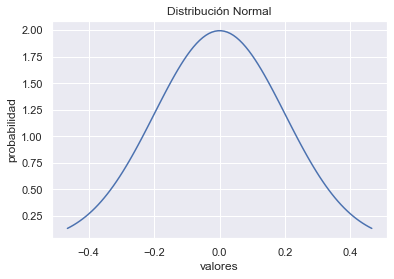

In [24]:
# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

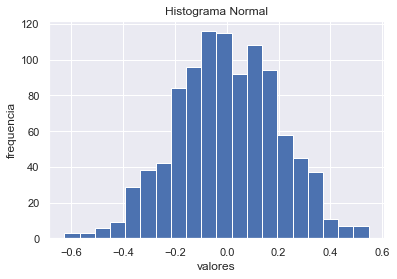

In [25]:
# histograma
aleatorios = normal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Normal')
plt.show()

### Distribución Uniforme

La [Distribución Uniforme](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_uniforme_discreta) es un caso muy simple expresada por la función:

$$f(x; a, b) = \frac{1}{b -a} \ \mbox{para} \ a \le x \le b
$$

Su [función de distribución](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n) esta entonces dada por:

$$
p(x;a, b) = \left\{
	\begin{array}{ll}
            0  & \mbox{si } x \le a \\
            \frac{x-a}{b-a} & \mbox{si } a \le x \le b \\
            1 & \mbox{si } b \le x
	\end{array}
\right.
$$

Todos los valore tienen prácticamente la misma probabilidad.

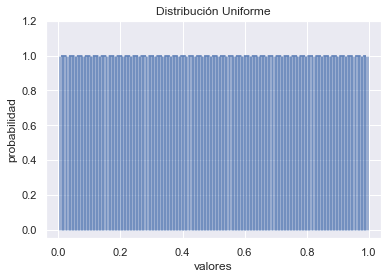

In [26]:
# Graficando Uniforme
uniforme = stats.uniform()
x = np.linspace(uniforme.ppf(0.01),
                uniforme.ppf(0.99), 100)
fp = uniforme.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fp, '--')
ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
plt.title('Distribución Uniforme')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

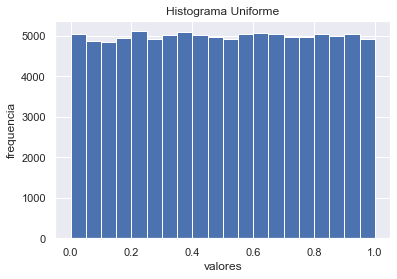

In [27]:
# histograma
aleatorios = uniforme.rvs(100000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Uniforme')
plt.show()

### Distribución de Log-normal

La [Distribución Log-normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_log-normal) esta dada por la formula:

$$p(x;\mu, \sigma) = \frac{1}{ x \sigma \sqrt{2 \pi}} e^{\frac{-1}{2}\left(\frac{\ln x - \mu}{\sigma} \right)^2}
$$

En dónde la variable $x > 0$ y los parámetros $\mu$ y $\sigma > 0$ son todos [números reales](https://es.wikipedia.org/wiki/N%C3%BAmero_real). La [Distribución Log-normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_log-normal) es aplicable a [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria) que están limitadas por cero, pero tienen pocos valores grandes. Es una [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) con [asimetría positiva](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica). Algunos de los ejemplos en que la solemos encontrar son:
* El peso de los adultos.
* La concentración de los minerales en depósitos.
* Duración de licencia por enfermedad.
* Distribución de riqueza
* Tiempos muertos de maquinarias.

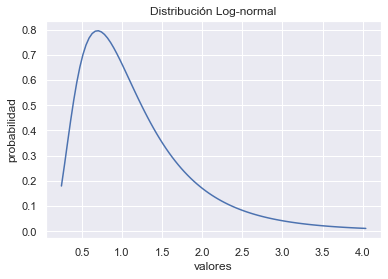

In [28]:
# Graficando Log-Normal
sigma = 0.6 # parametro
lognormal = stats.lognorm(sigma)
x = np.linspace(lognormal.ppf(0.01),
                lognormal.ppf(0.99), 100)
fp = lognormal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Log-normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

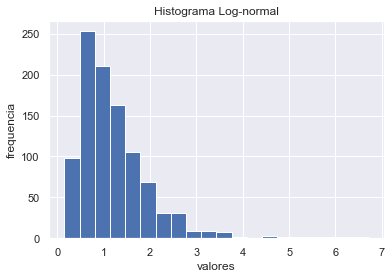

In [29]:
# histograma
aleatorios = lognormal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Log-normal')
plt.show()

### Distribución de Exponencial

La [Distribución Exponencial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_exponencial) esta dada por la formula:

$$p(x;\alpha) = \frac{1}{ \alpha} e^{\frac{-x}{\alpha}}
$$

En dónde tanto la variable $x$ como el parámetro $\alpha$ son [números reales](https://es.wikipedia.org/wiki/N%C3%BAmero_real) positivos. La [Distribución Exponencial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_exponencial) tiene bastantes aplicaciones, tales como la desintegración de un átomo radioactivo o el tiempo entre eventos en un proceso de [Poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson) donde los acontecimientos suceden a una velocidad constante.

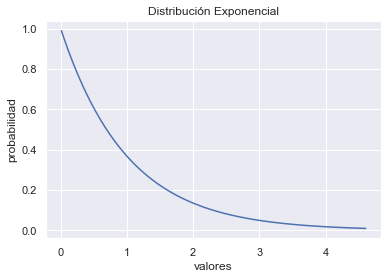

In [30]:
# Graficando Exponencial
exponencial = stats.expon()
x = np.linspace(exponencial.ppf(0.01),
                exponencial.ppf(0.99), 100)
fp = exponencial.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Exponencial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

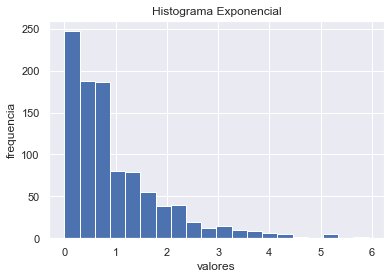

In [31]:
# histograma
aleatorios = exponencial.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Exponencial')
plt.show()

### Distribución Gamma

La [Distribución Gamma](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma) esta dada por la formula:

$$p(x;a, b) = \frac{a(a x)^{b -1} e^{-ax}}{\Gamma(b)}
$$

En dónde los parámetros $a$ y $b$ y la variable $x$ son [números reales](https://es.wikipedia.org/wiki/N%C3%BAmero_real) positivos y $\Gamma(b)$ es la [función gamma](https://es.wikipedia.org/wiki/Funci%C3%B3n_gamma). La [Distribución Gamma](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma) comienza en el *origen* de coordenadas y tiene una forma bastante flexible. Otras [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) son casos especiales de ella.

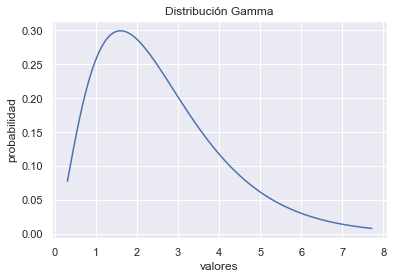

In [32]:
# Graficando Gamma
a = 2.6 # parametro de forma.
gamma = stats.gamma(a)
x = np.linspace(gamma.ppf(0.01),
                gamma.ppf(0.99), 100)
fp = gamma.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Gamma')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

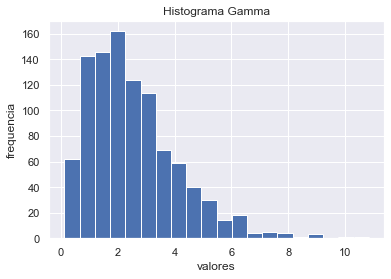

In [33]:
# histograma
aleatorios = gamma.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Gamma')
plt.show()

### Distribución Beta

La [Distribución Beta](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_beta) esta dada por la formula:

$$p(x;p, q) = \frac{1}{B(p, q)} x^{p-1}(1 - x)^{q-1}
$$

En dónde los parámetros $p$ y $q$ son [números reales](https://es.wikipedia.org/wiki/N%C3%BAmero_real) positivos, la variable $x$ satisface la condición $0 \le x \le 1$ y $B(p, q)$ es la [función beta](https://es.wikipedia.org/wiki/Funci%C3%B3n_beta). Las aplicaciones de la [Distribución Beta](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_beta) incluyen el modelado de [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria) que tienen un rango finito de $a$ hasta $b$. Un
ejemplo de ello es la distribución de los tiempos de actividad en las redes de proyectos. La [Distribución Beta](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_beta) se utiliza también con frecuencia como una [probabilidad a priori](https://es.wikipedia.org/wiki/Probabilidad_a_priori) para proporciones [binomiales]((https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial) en el [análisis bayesiano](https://es.wikipedia.org/wiki/Inferencia_bayesiana).

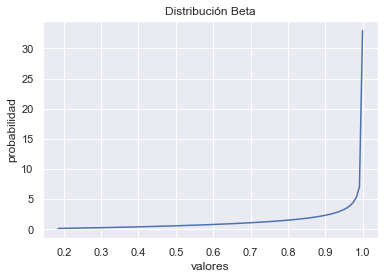

In [34]:
# Graficando Beta
a, b = 2.3, 0.6 # parametros de forma.
beta = stats.beta(a, b)
x = np.linspace(beta.ppf(0.01),
                beta.ppf(0.99), 100)
fp = beta.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Beta')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

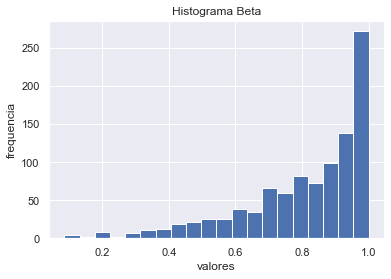

In [35]:
# histograma
aleatorios = beta.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Beta')
plt.show()

### Distribución Chi cuadrado

La [Distribución Chi cuadrado](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2) esta dada por la función:

$$p(x; n) = \frac{\left(\frac{x}{2}\right)^{\frac{n}{2}-1} e^{\frac{-x}{2}}}{2\Gamma \left(\frac{n}{2}\right)}
$$

En dónde la variable $x \ge 0$ y el parámetro $n$, el número de grados de libertad, es un [número entero](https://es.wikipedia.org/wiki/N%C3%BAmero_entero) positivo. Una importante aplicación de la [Distribución Chi cuadrado](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2) es que cuando un [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos) es representado por un modelo teórico, esta [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) puede ser utilizada para controlar cuan bien se ajustan los valores predichos por el modelo, y los datos realmente observados.

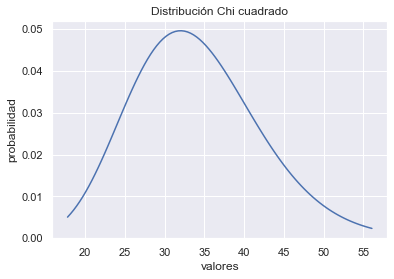

In [36]:
# Graficando Chi cuadrado
df = 34 # parametro de forma.
chi2 = stats.chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Chi cuadrado')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

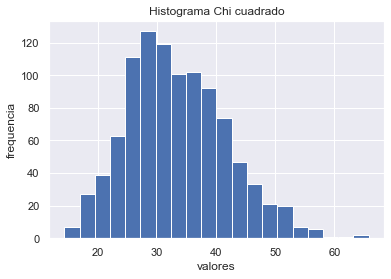

In [37]:
# histograma
aleatorios = chi2.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Chi cuadrado')
plt.show()

### Distribución T de Student

La [Distribución t de Student](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) esta dada por la función:

$$p(t; n) = \frac{\Gamma(\frac{n+1}{2})}{\sqrt{n\pi}\Gamma(\frac{n}{2})} \left( 1 + \frac{t^2}{2} \right)^{-\frac{n+1}{2}}
$$

En dónde la variable $t$ es un [número real](https://es.wikipedia.org/wiki/N%C3%BAmero_real) y el parámetro $n$ es un [número entero](https://es.wikipedia.org/wiki/N%C3%BAmero_entero) positivo. La [Distribución t de Student](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) es utilizada para probar si la diferencia entre las *medias* de dos muestras de observaciones es estadísticamente significativa. Por ejemplo, las alturas de una muestra aleatoria de los jugadores de baloncesto podría compararse con las alturas de una muestra aleatoria de jugadores de fútbol; esta [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) nos podría ayudar a determinar si un grupo es significativamente más alto que el otro.

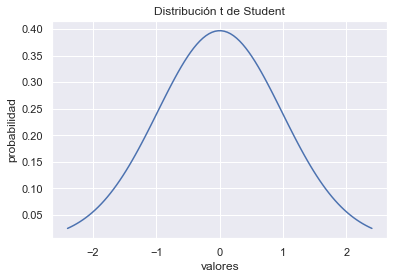

In [38]:
# Graficando t de Student
df = 50 # parametro de forma.
t = stats.t(df)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución t de Student')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

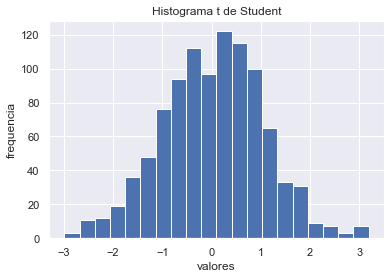

In [39]:
# histograma
aleatorios = t.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma t de Student')
plt.show()

### Distribución de Pareto

La [Distribución de Pareto](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Pareto) esta dada por la función:

$$p(x; \alpha, k) = \frac{\alpha k^{\alpha}}{x^{\alpha + 1}} 
$$

En dónde la variable $x \ge k$ y el parámetro $\alpha > 0$ son [números reales](https://es.wikipedia.org/wiki/N%C3%BAmero_real). Esta [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) fue introducida por su inventor, [Vilfredo Pareto](https://es.wikipedia.org/wiki/Vilfredo_Pareto), con el fin de explicar la distribución de los salarios en la sociedad. La [Distribución de Pareto](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Pareto) se describe a menudo como la base de la [regla 80/20](https://es.wikipedia.org/wiki/Principio_de_Pareto). Por ejemplo, el 80% de las quejas de los clientes con respecto al funcionamiento de su vehículo por lo general surgen del 20% de los componentes.

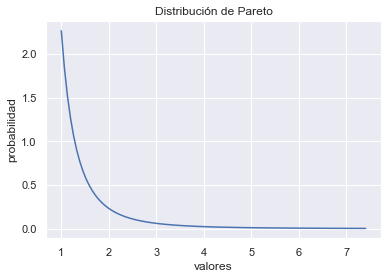

In [40]:
# Graficando Pareto
k = 2.3 # parametro de forma.
pareto = stats.pareto(k)
x = np.linspace(pareto.ppf(0.01),
                pareto.ppf(0.99), 100)
fp = pareto.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución de Pareto')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

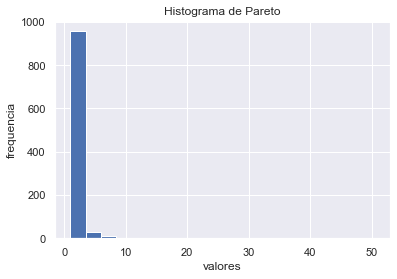

In [41]:
# histograma
aleatorios = pareto.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma de Pareto')
plt.show()

## Histogramas y Distribuciones

Muchas veces los indicadores de la *[estadística descriptiva](https://es.wikipedia.org/wiki/Estad%C3%ADstica_descriptiva)* no nos proporcionan una imagen clara de nuestros *[datos](https://es.wikipedia.org/wiki/Dato)*.  Por esta razón, siempre es útil complementarlos con gráficos de las distribuciones de los *[datos](https://es.wikipedia.org/wiki/Dato)*, que describan con qué frecuencia aparece cada valor. La representación más común de una distribución es un [histograma](https://es.wikipedia.org/wiki/Histograma), que es un gráfico que muestra la frecuencia o probabilidad de cada valor. El [histograma](https://es.wikipedia.org/wiki/Histograma) muestra las frecuencias como un gráfico de barras que indica cuan frecuente un determinado valor ocurre en el [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos). El eje horizontal representa los valores del [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos) y el eje vertical representa la frecuencia con que esos valores ocurren.

Las distribuciones se pueden clasificar en dos grandes grupos:

1. Las **[distribuciones continuas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad_continua)**, que son aquellas que presentan un número infinito de posibles soluciones. Dentro de este grupo vamos a encontrar a las distribuciones: 
    * [normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal),
    * [gamma](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma),
    * [chi cuadrado](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2), 
    * [t de Student](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student), 
    * [pareto](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Pareto),
    * entre otras

2. Las **distribuciones discretas**, que son aquellas en las que la variable puede pude tomar un número determinado de valores. Los principales exponenetes de este grupo son las distribuciones: 
    * [poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson),
    * [binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial),
    * [hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica),
    * [bernoulli](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Bernoulli)
    * entre otras

Veamos algunos ejemplos graficados con la ayuda de [Python](http://python.org/).

### Distribución normal

La [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) es una de las principales distribuciones, ya que es la que con más frecuencia aparece aproximada en los fenómenos reales. Tiene una forma acampanada y es simétrica respecto de un determinado parámetro estadístico. Con la ayuda de [Python](http://python.org/) la podemos graficar de la siguiente manera:

In [67]:
# Graficos embebidos.
%matplotlib inline 

In [68]:
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
sns.set()


In [69]:
mu, sigma = 0, 0.1 # media y desvio estandar
s = np.random.normal(mu, sigma, 1000) #creando muestra de datos

/Users/ddl/anaconda3/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


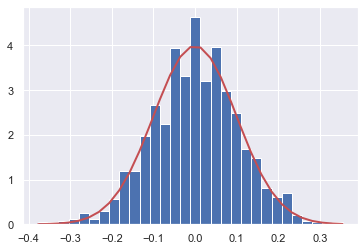

In [70]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(s, 30, normed=True)
normal = plt.plot(cajas, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (cajas - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

### Distribuciones simetricas y asimetricas

Una distribución es simétrica cuando moda, mediana y media coinciden aproximadamente en sus valores. Si una distribución es simétrica, existe el mismo número de valores a la derecha que a la izquierda de la media, por tanto, el mismo número de desviaciones con signo positivo que con signo negativo.

Una distribución tiene [asimetria](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica) positiva (o a la derecha) si la "cola" a la derecha de la media es más larga que la de la izquierda, es decir, si hay valores más separados de la media a la derecha. De la misma forma una distribución tiene [asimetria](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica) negativa (o a la izquierda) si la "cola" a la izquierda de la media es más larga que la de la derecha, es decir, si hay valores más separados de la media a la izquierda.

Las distribuciones asimétricas suelen ser problemáticas, ya que la mayoría de los métodos estadísticos suelen estar desarrollados para distribuciones del tipo [normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal). Para salvar estos problemas se suelen realizar transformaciones a los datos para hacer a estas distribuciones más simétricas y acercarse a la [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal).  

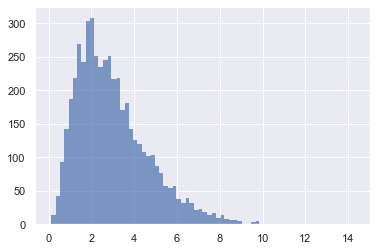

In [71]:
# Dibujando la distribucion Gamma
x = stats.gamma(3).rvs(5000)
gamma = plt.hist(x, 70, histtype="stepfilled", alpha=.7)

En este ejemplo podemos ver que la [distribución gamma](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma) que dibujamos tiene una [asimetria](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica) positiva. 

In [72]:
# Calculando la simetria con scipy
stats.skew(x)

1.1437199125547866

## ¿Cómo elegir la distribución que mejor se ajusta a mis datos?

Ahora ya tenemos un conocimiento general de las principales [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) con que nos podemos encontrar; pero ¿cómo determinamos que [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) debemos utilizar?

Un modelo que podemos seguir cuando nos encontramos con datos que necesitamos ajustar a una [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad), es comenzar con los datos sin procesar y responder a cuatro preguntas básicas acerca de los mismos, que nos pueden ayudar a caracterizarlos. La **primer pregunta** se refiere a si los datos **pueden tomar valores [discretos](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad#Distribuciones_de_variable_discreta) o [continuos](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad_continua)**. **La segunda pregunta** que nos debemos hacer, hace referencia a la **[simetría](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica) de los datos** y si hay asimetría, en qué dirección se encuentra; en otras palabras, son los [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico) positivos y negativos igualmente probables o es uno más probable que el otro. **La tercer pregunta** abarca los **límites superiores e inferiores en los datos**; hay algunos datos, como los ingresos, que no pueden ser inferiores a cero, mientras que hay otros, como los márgenes de operación que no puede exceder de un valor (100%). **La última pregunta** se refiere a la **posibilidad de observar valores extremos** en la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad); en algunos casos, los valores extremos ocurren con muy poca frecuencia, mientras que en otros, se producen con mayor frecuencia.
Este proceso, lo podemos resumir en el siguiente gráfico:

<img alt="Distribuciones estadísticas" title="Distribuciones estadísticas" src="http://relopezbriega.github.io/images/distributions_choice.png" >

Con la ayuda de estas preguntas fundamentales, más el conocimiento de las distintas [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) deberíamos estar en condiciones de poder caracterizar cualquier [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos).